In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from glob import glob
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 4})


In [8]:
Filters = \
    {
        1:  (438,28),
        2:  (472,35),
        3:  (500,29),
        4:  (527,22),
        5:  (549,21),
        6:  (561,21),
        7:  (586,26),
        8:  (605,22),
        9: (631,28),
        10: (661,26),
        11: (692,47),
        12:  (np.NaN,np.NaN)
    }
Filter_QE = \
    {
     1:     0.52654585,
     2:     0.61510198,
     3:     0.67157561,
     4:     0.70026282,
     5:     0.71884383,
     6:     0.72505143,
     7:     0.7279477,
     8:     0.72530424,
     9:    0.71414267,
     10:    0.68976776,
     11:    0.6438945 
    }
    

In [9]:
filtAv = [438, 472, 500, 527, 549, 561, 568, 605, 631, 661, 692]
filtUn = np.array([28, 35, 29, 22, 21, 21, 26, 22, 28, 26, 47]) / 2
filtQE = np.array([0.52654585, 0.61510198, 0.67157561, 0.70026282, 0.71884383, 0.72505143, 0.7279477, 0.72530424, 0.71414267, 0.68976776, 0.6438945])

In [251]:
roi = [200, 1648, 600, 2048]

# Analysis Bromobimane on fused silica

### Functions

In [156]:
def prepare_spectrum(files, roi):
    nfilt = len(files)
    
    img = io.imread(files[0]).astype(np.int32)
    imroi = img[roi[0]:roi[1], roi[2]:roi[3]]
    roiSize = imroi.shape[0] * imroi.shape[1]
    offset = 100 * roiSize

    avInt = []
    unInt = []
    for i in range(nfilt-1):
        img = io.imread(files[i]).astype(np.int32)
        imroi = img[roi[0]:roi[1], roi[2]:roi[3]]
        intPx = (imroi.sum() - offset) / roiSize
        avInt.append(intPx)
        
        unPx = np.sqrt((imroi**2).sum()) / roiSize
        unInt.append(unPx)

    avInt = np.array(avInt)
    unInt = np.array(unInt)
    cntQe = avInt / filtQE
    # cntQe /= (filtUn*2)

    unInt /= filtQE
    # unInt /= (filtUn*2)


    return cntQe, unInt

## Sample FS7: 1e-7 M

### Texp = 1 s, measurement 2

20/08/2024

File 0: T_exp = 1 s

File 1: T_exp = 10 s

File 2: T_exp = 1 s at fresh location

Continued next day. Stored all clean samples in vacuum.

21/08/2024

File: G:\My Drive\Ba Tagging\data\img\sets\21-08-24\FS7_Bromob_1e-7

File 0: T_exp = 10 s at fresh location

In [118]:
lb = ['$t_{exp}$ = 1 s, pos. 0', '$t_{exp}$ = 10 s, pos. 0', '$t_{exp}$ = 1 s, pos. 1', '$t_{exp}$ = 10 s, pos. 2']

In [111]:
path20 = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS7_Bromob_1e-7/'

files70 = glob(path20+'0/*.tif')
files70.sort()

files71 = glob(path20+'1/*.tif')
files71.sort()

files72 = glob(path20+'2/*.tif')
files72.sort()

path21 = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FS7_Bromob_1e-7/'

files73 = glob(path21+'0/*.tif')
files73.sort()

In [163]:
c70, un70 = prepare_spectrum(files70, roi)
c71, un71 = prepare_spectrum(files71, roi)
c72, un72 = prepare_spectrum(files72, roi)
c73, un73 = prepare_spectrum(files73, roi)


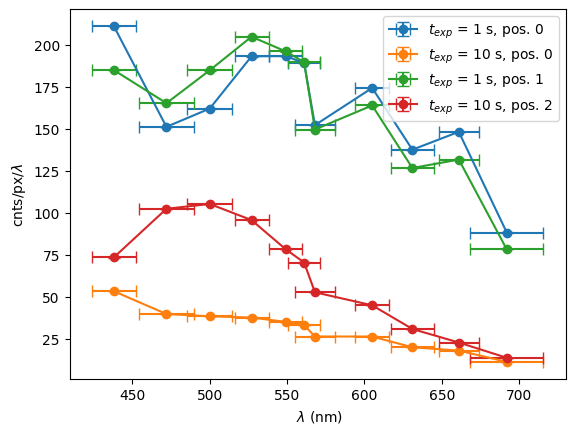

In [164]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c70/(filtUn*2), yerr=un70/(filtUn*2), fmt='o-', label=lb[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c71/(filtUn*2), yerr=un71/(filtUn*2), fmt='o-', label=lb[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c72/(filtUn*2), yerr=un72/(filtUn*2), fmt='o-', label=lb[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c73/(filtUn*2), yerr=un73/(filtUn*2), fmt='o-', label=lb[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

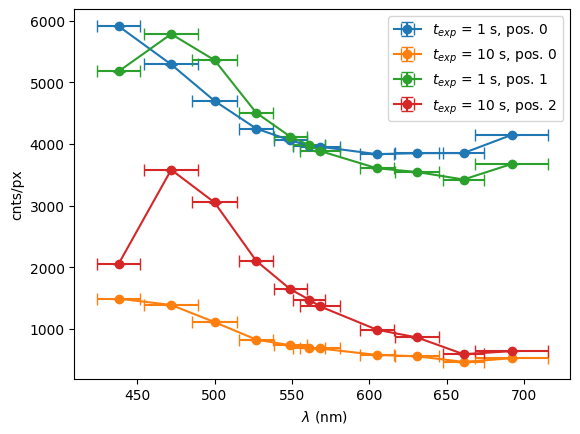

In [ ]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c70, yerr=un70, fmt='o-', label=lb[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c71, yerr=un71, fmt='o-', label=lb[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c72, yerr=un72, fmt='o-', label=lb[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c73, yerr=un73, fmt='o-', label=lb[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px')
plt.legend()

<ErrorbarContainer object of 3 artists>

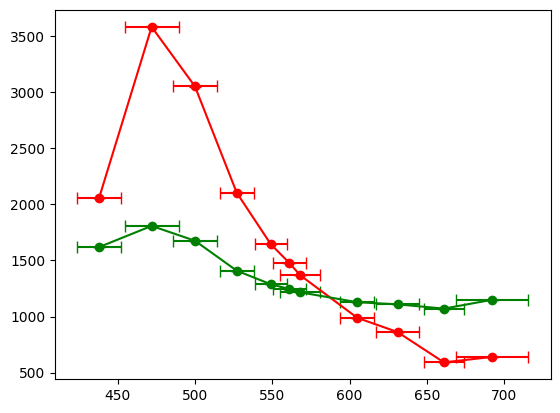

In [125]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c73, yerr=un73, fmt='ro-', label=lb[3])
plt.errorbar(x = filtAv, xerr=filtUn, y = c72/3.2, yerr=un72/3.2, fmt='go-', label=lb[2])

## Sample FS6: 1e-6 M

21/08/2024

FS6 sample: clean Fused silica + spin-coating Bromobimane 1e-6 M

The solvent (metOH) mostly disappeared so we added more (40 uL), the concentration is therefore not known exactly. The solution was deposited on a clean sample which was stored overnight in vacuum. Again, the Eppendorf did not contain 12.5 uL, since it depleted and the pipette absorbed air.

P = 460 uW at the sample. P_LED = 3.49 mW (I_LED = 34.1 mA)

G:\My Drive\Ba Tagging\data\img\sets\21-08-24\FS6_Bromob_1e-6

File 0: T_exp = 1 s

File 1: T_exp = 1 s at fresh location

File 2: T_exp = 10 s at same location

File 3: T_exp = 10 s at fresh location

File 4: T_exp = 1 s, time evolution

In [142]:
lb6 = ['$t_{exp}$ = 1 s, pos. 0', '$t_{exp}$ = 1 s, pos. 1', '$t_{exp}$ = 10 s, pos. 1', '$t_{exp}$ = 10 s, pos. 2']
 

In [139]:
pathSS = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FS6_Bromob_1e-6/'

files60 = glob(pathSS+'0/*.tif')
files60.sort()

files61 = glob(path216+'1/*.tif')
files61.sort()

files62 = glob(pathSS+'2/*.tif')
files62.sort()

files63 = glob(pathSS+'3/*.tif')
files63.sort()

In [159]:
c60, un60 = prepare_spectrum(files60, roi)
c61, un61 = prepare_spectrum(files61, roi)
c62, un62 = prepare_spectrum(files62, roi)
c63, un63 = prepare_spectrum(files63, roi)

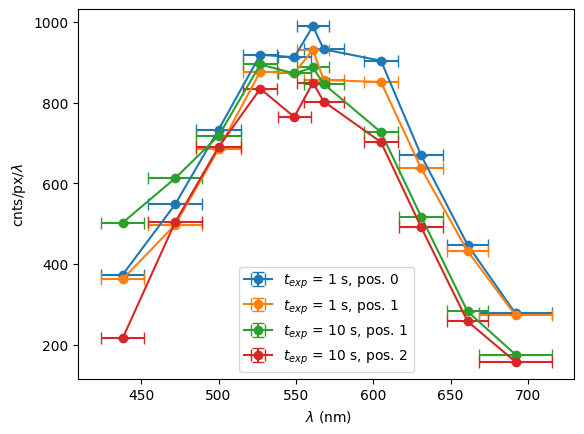

In [160]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c60/(filtUn*2), yerr=un60/(filtUn*2), fmt='o-', label=lb6[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c61/(filtUn*2), yerr=un61/(filtUn*2), fmt='o-', label=lb6[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c62/(filtUn*2), yerr=un62/(filtUn*2), fmt='o-', label=lb6[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c63/(filtUn*2), yerr=un63/(filtUn*2), fmt='o-', label=lb6[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

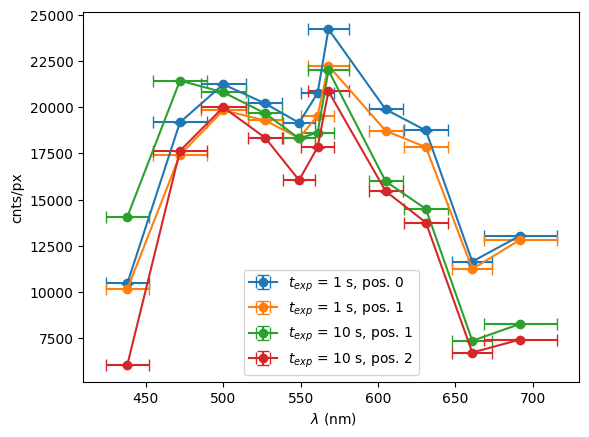

In [161]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c60, yerr=un60, fmt='o-', label=lb6[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c61, yerr=un61, fmt='o-', label=lb6[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c62, yerr=un62, fmt='o-', label=lb6[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c63, yerr=un63, fmt='o-', label=lb6[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px')
plt.legend()

## Clean FS + solvent only

Solvent only (MetOH)

G:\My Drive\Ba Tagging\data\img\sets\21-08-24\FSS_MetOH

File 0: T_exp = 1 s

File 1: T_exp = 1 s at fresh location

File 2: T_exp = 10 s at fresh location

File 3: T_exp = 10 s at fresh location

In [187]:
pathSS = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FSS_MetOH/'

filesS0 = glob(pathSS+'0/*.tif')
filesS0.sort()

filesS1 = glob(pathSS+'1/*.tif')
filesS1.sort()

filesS2 = glob(pathSS+'2/*.tif')
filesS2.sort()

filesS3 = glob(pathSS+'3/*.tif')
filesS3.sort()

In [188]:
cS0, unS0 = prepare_spectrum(filesS0, roi)
cS1, unS1 = prepare_spectrum(filesS1, roi)
cS2, unS2 = prepare_spectrum(filesS2, roi)
cS3, unS3 = prepare_spectrum(filesS3, roi)

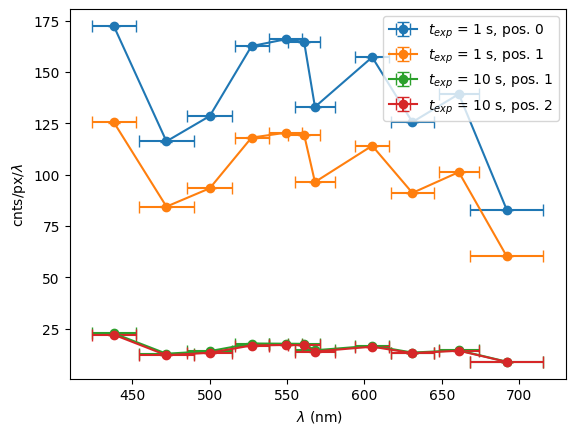

In [189]:
plt.errorbar(x = filtAv, xerr=filtUn, y = cS0/(filtUn*2), yerr=unS0/(filtUn*2), fmt='o-', label=lb6[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = cS1/(filtUn*2), yerr=unS1/(filtUn*2), fmt='o-', label=lb6[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = cS2/(filtUn*2), yerr=unS2/(filtUn*2), fmt='o-', label=lb6[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = cS3/(filtUn*2), yerr=unS3/(filtUn*2), fmt='o-', label=lb6[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

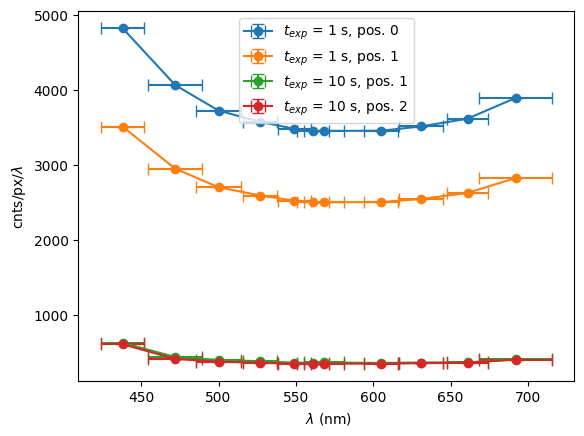

In [190]:
plt.errorbar(x = filtAv, xerr=filtUn, y = cS0, yerr=unS0, fmt='o-', label=lb6[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = cS1, yerr=unS1, fmt='o-', label=lb6[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = cS2, yerr=unS2, fmt='o-', label=lb6[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = cS3, yerr=unS3, fmt='o-', label=lb6[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

## Clean FS

FS2 sample: baked fused silica

Baked for 4h at 300 deg. Measured immediately after

P = 460 uW at the sample. P_LED = 3.49 mW (I_LED = 34.1 mA)

Path: G:\My Drive\Ba Tagging\data\img\sets\20-08-24\FS2_FusedSilica_baked

Note: moved the data to directory 19-08-24\FS2_FusedSilica_baked for convenience

File 0: T_exp = 1 s

File 1: T_exp = 10 s

FS3 sample: baked fused silica + UV (baseline cleanliness)

Baked for 4h at 300 deg. 30 min UV cleaning. Measured immediately after

P = 460 uW at the sample. P_LED = 3.49 mW (I_LED = 34.1 mA)

Path: G:\My Drive\Ba Tagging\data\img\sets\20-08-24\FS3_FusedSilica_bakedUV

Note: moved the data to directory 19-08-24\FS3_FusedSilica_bakedUV for convenience

File 0: T_exp = 1 s

File 1: T_exp = 10 s

In [214]:
pathFS = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/'

filesF0 = glob(pathFS+'0/*.tif')
filesF0.sort()

filesF1 = glob(pathFS+'1/*.tif')
filesF1.sort()

pathFSUV = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS3_FusedSilica_bakedUV/'

filesF2 = glob(pathFSUV+'0/*.tif')
filesF2.sort()

filesF3 = glob(pathFSUV+'1/*.tif')
filesF3.sort()

In [216]:
filesF1

['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-438nm_Width-28nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-472nm_Width-35nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-500nm_Width-29nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-527nm_Width-22nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-549nm_Width-21nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba T

In [217]:
cF0, unF0 = prepare_spectrum(filesF0, roi)
cF1, unF1 = prepare_spectrum(filesF1, roi)
cF2, unF2 = prepare_spectrum(filesF2, roi)
cF3, unF3 = prepare_spectrum(filesF3, roi)

In [222]:
lbFS = ['Bake, $t_{exp}$ = 1 s', 'Bake, $t_{exp}$ = 10 s', 'Bake + UV, $t_{exp}$ = 1 s', 'Baked + UV $t_{exp}$ = 10 s']
['$t_{exp}$ = 1 s, pos. 0', '$t_{exp}$ = 1 s, pos. 1', '$t_{exp}$ = 10 s, pos. 1', '$t_{exp}$ = 10 s, pos. 2'];

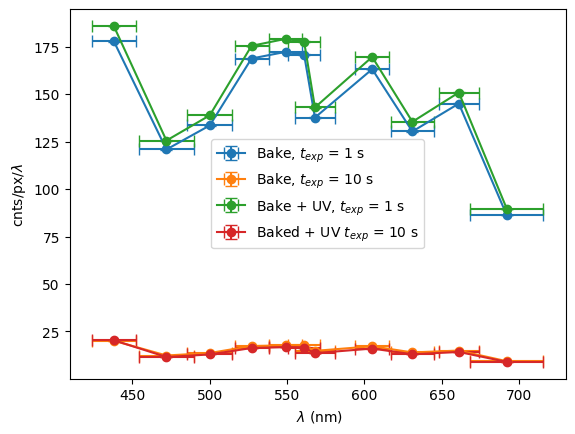

In [221]:
plt.errorbar(x = filtAv, xerr=filtUn, y = cF0/(filtUn*2), yerr=unF0/(filtUn*2), fmt='o-', label=lbFS[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = cF1/(filtUn*2), yerr=unF1/(filtUn*2), fmt='o-', label=lbFS[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = cF2/(filtUn*2), yerr=unF2/(filtUn*2), fmt='o-', label=lbFS[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = cF3/(filtUn*2), yerr=unF3/(filtUn*2), fmt='o-', label=lbFS[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

## Compare all samples

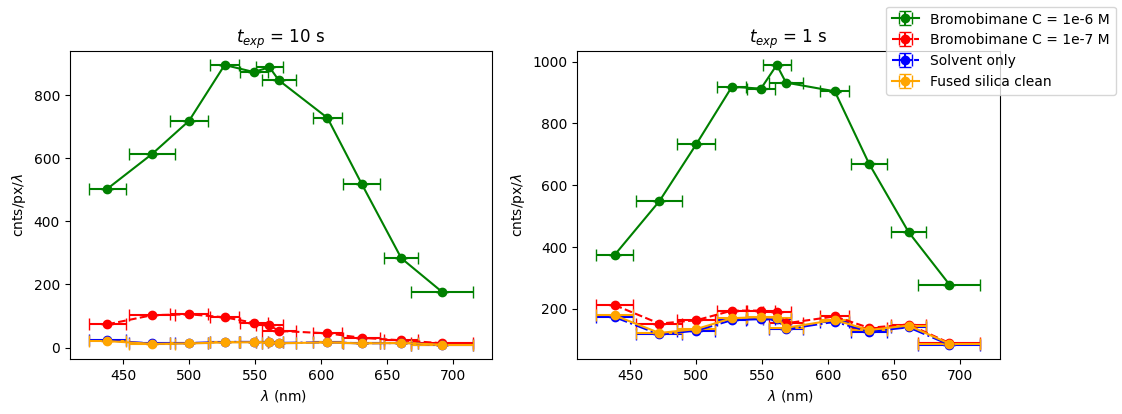

In [246]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].errorbar(x = filtAv, xerr=filtUn, y = c62/(filtUn*2), yerr=un62/(filtUn*2), fmt='go-', label='Bromobimane C = 1e-6 M')
ax[0].errorbar(x = filtAv, xerr=filtUn, y = c73/(filtUn*2), yerr=un73/(filtUn*2), fmt='ro--', label='Bromobimane C = 1e-7 M')
ax[0].errorbar(x = filtAv, xerr=filtUn, y = cS2/(filtUn*2), yerr=unS2/(filtUn*2), fmt='bo-.', label='Solvent only')
ax[0].errorbar(x = filtAv, xerr=filtUn, y = cF3/(filtUn*2), yerr=unF3/(filtUn*2), color='orange', fmt='o-', label='Fused silica clean')
ax[0].set(title ='$t_{exp}$ = 10 s')

ax[1].errorbar(x = filtAv, xerr=filtUn, y = c60/(filtUn*2), yerr=un60/(filtUn*2), fmt='go-', )
ax[1].errorbar(x = filtAv, xerr=filtUn, y = c70/(filtUn*2), yerr=un70/(filtUn*2), fmt='ro--',)
ax[1].errorbar(x = filtAv, xerr=filtUn, y = cS0/(filtUn*2), yerr=unS0/(filtUn*2), fmt='bo-.', )
ax[1].errorbar(x = filtAv, xerr=filtUn, y = cF0/(filtUn*2), yerr=unF0/(filtUn*2), color='orange', fmt='o-', )
ax[1].set(title ='$t_{exp}$ = 1 s')
ax[0].set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$', yscale='linear')
ax[1].set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$', yscale='linear')

fig.legend()


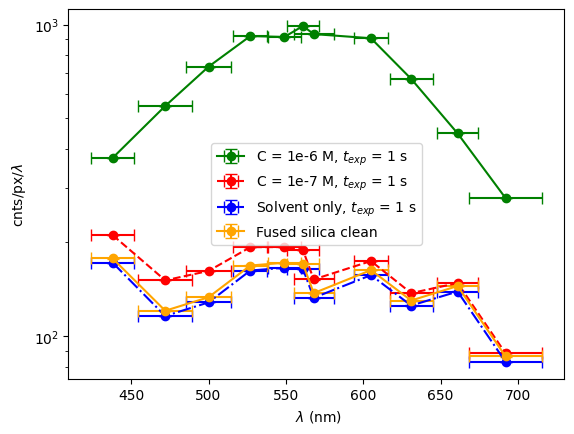

In [232]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c60/(filtUn*2), yerr=un60/(filtUn*2), fmt='go-', label='C = 1e-6 M, $t_{exp}$ = 1 s')
plt.errorbar(x = filtAv, xerr=filtUn, y = c70/(filtUn*2), yerr=un70/(filtUn*2), fmt='ro--', label='C = 1e-7 M, $t_{exp}$ = 1 s')

plt.errorbar(x = filtAv, xerr=filtUn, y = cS0/(filtUn*2), yerr=unS0/(filtUn*2), fmt='bo-.', label='Solvent only, $t_{exp}$ = 1 s')
plt.errorbar(x = filtAv, xerr=filtUn, y = cF0/(filtUn*2), yerr=unF0/(filtUn*2), color='orange', fmt='o-', label='Fused silica clean')

plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$', yscale='log')
plt.legend()


## Example of images, ROI and histogram

### FS7, file 2

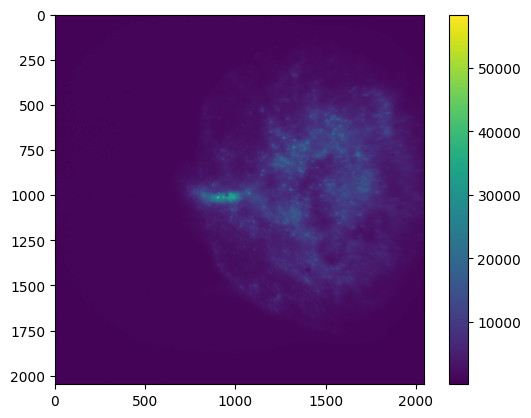

In [165]:
img = io.imread(files72[11]).astype(np.int32)
plt.imshow(img, )#clim=(1e4,5e4) )
plt.colorbar()

(1448, 1448)


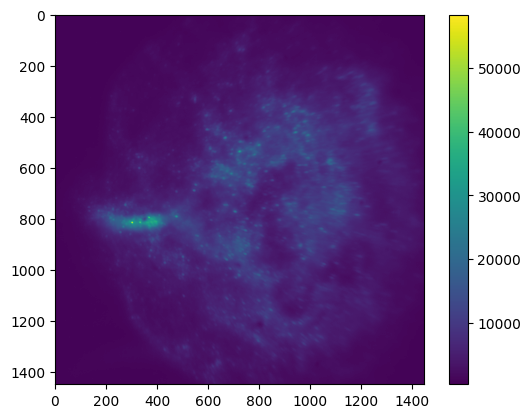

In [166]:
roi = [200, 1648, 600, 2048]
imroi = img[roi[0]:roi[1], roi[2]:roi[3]]
print(imroi.shape)
plt.imshow(imroi)
plt.colorbar()

[None]

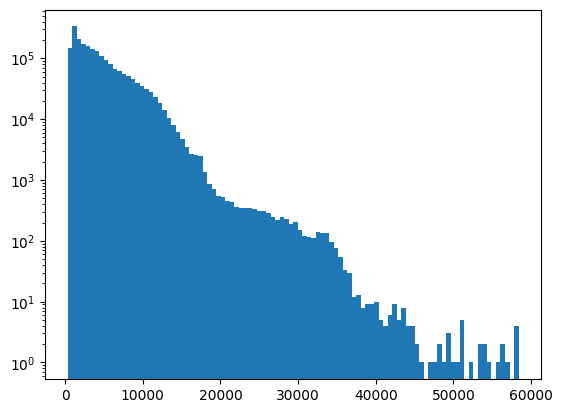

In [167]:
plt.hist(np.array(imroi).flatten(), bins=100);
plt.gca().set(yscale= 'log')#, xlim = (0, 1e4))


### FS6, file 2

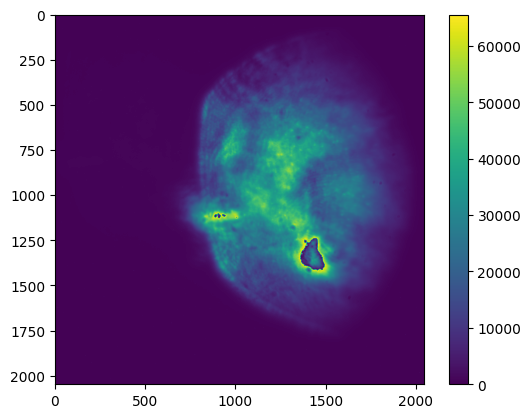

In [176]:
img = io.imread(files62[1]).astype(np.int32)
plt.imshow(img, )#clim=(1e4,5e4) )
plt.colorbar()

### FS6, file 0

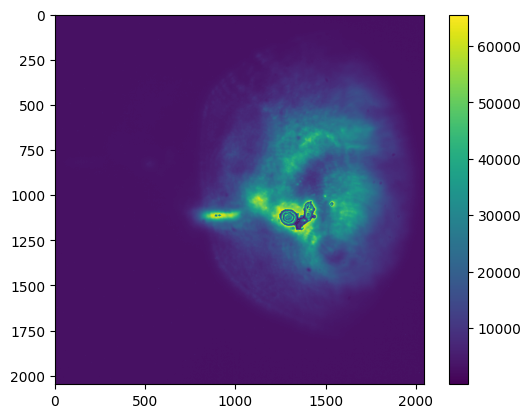

In [178]:
img = io.imread(files60[1]).astype(np.int32)
plt.imshow(img, )#clim=(1e4,5e4) )
plt.colorbar()

## Time runs

In [248]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FS6_Bromob_1e-6/4/time_run'
filetime6 = glob(path+'/*.tif')
filetime6.sort()
len(filetime6)

400

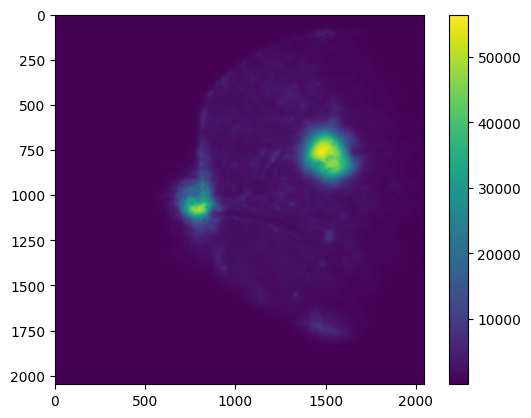

In [324]:
img = io.imread(filetime6[350]).astype(np.int32)
plt.imshow(img, )#clim=(1e4,5e4) )
plt.colorbar()

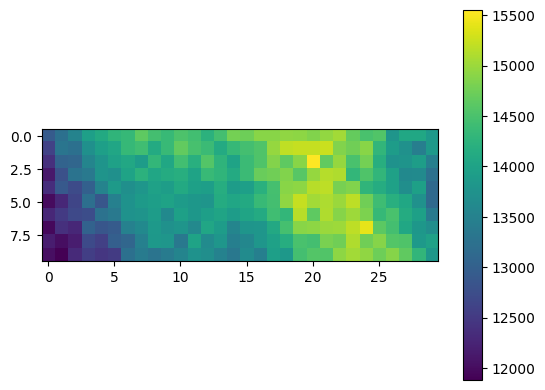

In [254]:
roit = [1250, 1260, 1220, 1250]
imroit = img[roit[0]:roit[1], roit[2]:roit[3]]
plt.imshow(imroit, )#clim=(1e4,5e4) )
plt.colorbar()

In [301]:
trajmat = np.zeros_like(imroit)
k, l = 1, 3

i, j = 1250 + k, 1220 + l

inds = [[1251, 1235], [1251, 1240], [1258, 1220], [1258, 1240]]
trajmat = np.zeros((4, 400))



for n,k in enumerate(inds):
    print(k)
    traij = []
    for f in filetime6:
        px = io.imread(f).astype(np.int32)[k[0], k[1]]
        traij.append(px)

    trajmat[n] = traij


[1251, 1235]
[1251, 1240]
[1258, 1220]
[1258, 1240]


[Text(0.5, 0, 'time (s)'), Text(0, 0.5, 'Counts/pixel')]

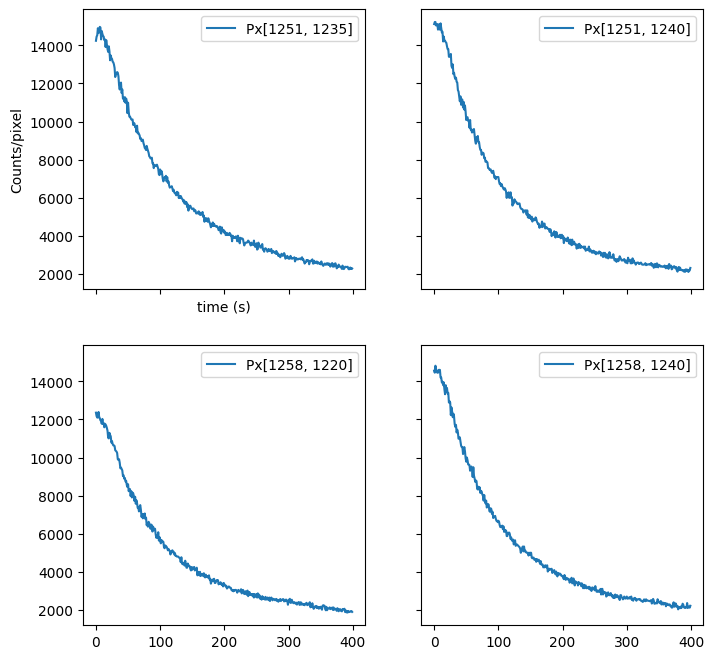

In [312]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey=True, sharex=True)
ax[0,0].plot(trajmat[0], label='Px'+str(inds[0]))
ax[0,1].plot(trajmat[1], label='Px'+str(inds[1]))
ax[1,0].plot(trajmat[2], label='Px'+str(inds[2]))
ax[1,1].plot(trajmat[3], label='Px'+str(inds[3]))

for a in ax:
    for b in a: b.legend()
ax[0, 0].set(xlabel='time (s)', ylabel='Counts/pixel')
# ax[1].set(xlabel='time (s)', title='Pixel (1257, 1223)')

## Time run FS6

In [ ]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FS6_Bromob_1e-6/4/time_run'
filetime6 = glob(path+'/*.tif')
filetime6.sort()
len(filetime6)

400